#### Batch training vs Stochastic training

In order for Tensorflow to compute the variable gradient for backpropagation to work, we have to measure the loss on one example or on the average of multiple examples at once. Stochastic training is only putting througone randomly selected example at a time, just we did in the previous example, while batch training will take a larger portion and average over them before updating the variables. Batch sizes may vary.

>In the example below, we would perform update on the variable using batch gradient descent

In [107]:
#Load our libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
sess = tf.Session()

> we declare the batch size. This is how many data observation will be fed into the computational graph as once:
    

In [108]:
batch_size = 20

> Next we declare the data, Variables and Placholders. We will make them 2 dimensional because of the batch size. The first dimension which will hold the batch size will be set to None. None here is a generalization which means it can accept any dimension later, and the second dimension is number of features/points a particular data has.

In [128]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

X_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
Y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

W = tf.Variable(tf.constant(0., shape=[1,1]))   #It is good practice to initialize the weight to zero


>Now we add our operation to the graph, which will now be matrix
multiplication -because we vectorizing over multiple samples at a time- instead of regular multiplication. Remember that matrix
multiplication is not communicative so we have to enter the matrices
in the correct order in the matmul() function:

In [130]:
Y_pred = tf.matmul(X_data, W)

# initialize our variables
init = tf.global_variables_initializer()
sess.run(init)

> Since we are doing batch update, our Loss function (L2 norm in this case) will change because we have to average over all the L2 losses of each data point in the batch. We do this by wrapping our normal L2 loss function in the Tensorflow's ```reduce_mean()``` function:

In [131]:
loss = tf.reduce_mean(tf.square(Y_pred - Y_target))

# Declare the optimizer (G.D)
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

> Finally we define our training loop and iterate on the training step to optimize the algorithm. Here we will store the resulting losses on every 20 intervals in a list so we can plot and compare the result with stochastic version 

In [132]:
loss_batch = []

for i in range(100):
    #pick a random 20 data points
    rand_index = np.random.choice(100, size=batch_size)
    x_batch = np.transpose([x_vals[rand_index]])  # Transpose to the correct shape
    y_batch = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={X_data: x_batch, Y_target:y_batch})
    #Print the result after 5 intervals
    if(i+1) % 5 == 0:
        print('Step #', str(i+1), 'W = ', str(sess.run(W)))
        temp_loss = sess.run(loss, feed_dict={X_data: x_batch, Y_target:y_batch})
        loss_batch.append(temp_loss)
        print('Loss = ', temp_loss)


Step # 5 W =  [[1.8312557]]
Loss =  67.06395
Step # 10 W =  [[3.3484054]]
Loss =  44.29212
Step # 15 W =  [[4.5652475]]
Loss =  28.448627
Step # 20 W =  [[5.561749]]
Loss =  19.111248
Step # 25 W =  [[6.371268]]
Loss =  13.332352
Step # 30 W =  [[7.0357347]]
Loss =  9.781584
Step # 35 W =  [[7.572345]]
Loss =  6.392692
Step # 40 W =  [[8.017921]]
Loss =  5.0436687
Step # 45 W =  [[8.391407]]
Loss =  3.3448594
Step # 50 W =  [[8.682007]]
Loss =  2.7619665
Step # 55 W =  [[8.90432]]
Loss =  1.9406185
Step # 60 W =  [[9.099782]]
Loss =  1.2964511
Step # 65 W =  [[9.271632]]
Loss =  1.0805912
Step # 70 W =  [[9.439992]]
Loss =  1.52861
Step # 75 W =  [[9.551593]]
Loss =  0.8340844
Step # 80 W =  [[9.639723]]
Loss =  0.47476703
Step # 85 W =  [[9.711311]]
Loss =  0.79173136
Step # 90 W =  [[9.74951]]
Loss =  0.91868913
Step # 95 W =  [[9.792597]]
Loss =  0.44345206
Step # 100 W =  [[9.825603]]
Loss =  0.72627574


> Batch training and stochastic training differ in their optimization method
and their convergence. Finding a good batch size can be difficult. To see
how convergence differs between batch and stochastic, we are going to plot the batch loss from above against the stochastic loss.

In [133]:
# Re-initialize our weight to zero again and perform the optimization on the same dataset
W = tf.Variable(tf.constant(0., shape=[1,1]))   #It is good practice to initialize the weight to zero
Y_pred = tf.matmul(X_data, W)

# initialize our variables
init = tf.global_variables_initializer()
sess.run(init)


In [134]:
loss_stochastic = []

for i in range(100):
    #pick a random 1 data points
    rand_index = np.random.choice(100, size=1)
    x_rand = np.transpose([x_vals[rand_index]])  # Transpose to the correct shape
    y_rand = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={X_data: x_rand, Y_target:y_rand})
    #Print the result after 5 intervals
    if(i+1) % 5 == 0:
        print('Step #', str(i+1), 'W = ', str(sess.run(W)))
        temp_loss = sess.run(loss, feed_dict={X_data: x_rand, Y_target:y_rand})
        loss_stochastic.append(temp_loss)
        print('Loss = ', temp_loss)

Step # 5 W =  [[0.]]
Loss =  71.557076
Step # 10 W =  [[0.]]
Loss =  47.528435
Step # 15 W =  [[0.]]
Loss =  34.38608
Step # 20 W =  [[0.]]
Loss =  14.534524
Step # 25 W =  [[0.]]
Loss =  18.006735
Step # 30 W =  [[0.]]
Loss =  2.7060955
Step # 35 W =  [[0.]]
Loss =  1.9482912
Step # 40 W =  [[0.]]
Loss =  4.4245973
Step # 45 W =  [[0.]]
Loss =  6.4716406
Step # 50 W =  [[0.]]
Loss =  0.031628504
Step # 55 W =  [[0.]]
Loss =  0.28665257
Step # 60 W =  [[0.]]
Loss =  0.004530938
Step # 65 W =  [[0.]]
Loss =  2.2774143
Step # 70 W =  [[0.]]
Loss =  0.02392008
Step # 75 W =  [[0.]]
Loss =  0.00026231856
Step # 80 W =  [[0.]]
Loss =  0.30289057
Step # 85 W =  [[0.]]
Loss =  2.0122638
Step # 90 W =  [[0.]]
Loss =  0.7046809
Step # 95 W =  [[0.]]
Loss =  0.2543571
Step # 100 W =  [[0.]]
Loss =  0.104610085


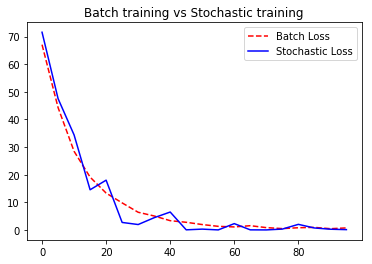

In [136]:

plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss')
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.legend(loc='upper right')
plt.title('Batch training vs Stochastic training')
plt.show()

> Note that from the plot above, the batch loss is much more smoother and the stochastic much erratic

Advantages of Stochastic training
- Randomness helps it avoid local minimums

Disadvantages of Stochastic training
- Generally, needs more iterations to converge.

Advantages of Batch training
- Find minimums quicker

Disadvantages of Batch training
- Takes more computational power to compute
